In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import xgboost

In [3]:
from functions import make_dataset

ModuleNotFoundError: No module named 'functions'

In [ ]:
from functions import make_portfolio

In [3]:
from sklearn.utils import shuffle


In [4]:
import time

In [5]:
import pickle

In [ ]:
import datetime

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [6]:
features1 = pd.read_pickle("training_sets/features1")

In [7]:
Date1 = np.load("training_sets/Date1.npy", allow_pickle = True)
Date2 = np.load("training_sets/Date2.npy", allow_pickle = True)
Date3 = np.load("training_sets/Date3.npy", allow_pickle = True)

In [8]:
Tickers1 = np.load("training_sets/Tickers1.npy", allow_pickle = True)
Tickers2 = np.load("training_sets/Tickers2.npy", allow_pickle = True)
Tickers3 = np.load("training_sets/Tickers3.npy", allow_pickle = True)

In [9]:
len(Tickers1), len(Tickers2), len(Tickers3)

(1705, 1961, 2001)

In [10]:
len(Date1), len(Date2), len(Date3)

(773, 786, 778)

In [ ]:
"""
for the prelim tests, we should explore random variation to get baseline average performance values,we should also monitor overtraining markers, (performance on training set itself over time)

To do this, lets get an idea of which training window to use, 40, 80 or 200?

3 training windows, lets have 33 random column selections used to estimate the average performance on a baseline xgboost model, (basic params)

lets do 21 prediction dates, 7 from each t-set

also because most vals non nan at index 360 bacause longest time period is close_x/close_360, so 360 should be start of training period, if we want 200 day window, 360 + 200 = 560 + 40 -1 = 599
prediction_number, so 599 - 40 + 1 = 560, therefore the training dates are Date[360:560], which has data of the 599th day, which is okay, but not of the 600th day
"""





In [83]:
cols_trials = []
for i in range(33):
    cols_trials.append(np.random.choice(features1.columns[:-3], np.random.randint(5, 31), replace = False))

In [11]:
cols_trials = []
for i in range(10):
    cols_trials.append(np.random.choice(features1.columns[:-3], 18, replace = False))

In [38]:
cols_trials

[array(['AROON_80', 'Cash & Cash Equivalents/Total Liabilities_YC',
        'close_80/Close_160', 'ABAND_indicator_160', 'volatility_160',
        'close_0/Close_160', 'Shares (Diluted)/Shares (Basic)_YC',
        'Total Noncurrent Assets/Total Assets_QC', 'RSI_14',
        'close_120/Close_240', 'volstd_20', 'volatility_40', 'DEMA_10',
        'ATR_20', 'Free Cash Flow/Revenue_YC',
        'Total Noncurrent Liabilities/Total Liabilities',
        'ABAND_signal_10', 'close_160/Close_360'], dtype=object),
 array(['Accounts & Notes Receivable/Revenue_YC', 'Net Profit Margin_QC',
        'Share Capital & Additional Paid-In Capital_YC', 'Net Income',
        'Market-Cap', 'Total Assets_YC', 'volstd_160', 'Total Assets',
        'OBV_160', 'Free Cash Flow/Shares Outstanding_QC',
        'close_40/Close_120', 'Total Equity_YC', 'close_20/Close_360',
        'EV/Sales',
        'Net Cash from Operating Activities/Cash & Cash Equivalents_QC',
        'Working Capital_YC', 'Net Income/Enterpris

In [ ]:
"""
every 80 days want a prediction date starting from 599
"""

In [12]:
Dates = np.append(np.append(Date1, Date2), Date3)

In [14]:
if "features2" in locals():
    print("ye")

In [15]:
prediction_dates = np.linspace(999, len(Dates) - 100, 10).astype(int)

In [16]:
prediction_dates

array([ 999, 1136, 1274, 1411, 1549, 1686, 1824, 1961, 2099, 2237])

In [90]:
prediction_dates = prediction_dates+40
prediction_dates = prediction_dates[:-1]

In [77]:
prediction_dates = prediction_dates+1

In [17]:
all_cols = np.array([])
for i in cols_trials:
    all_cols = np.append(all_cols, i)

In [18]:
unique_cols = np.unique(all_cols)

In [19]:
unique_cols = np.append(unique_cols, ["Class_binary_40_20", "return_40"])

In [20]:
len(unique_cols)

135

In [21]:
params2 = {
  'colsample_bynode': 0.6,
    'colsample_bytree' : 0.6,
    'colsample_bylevel' : 0.5,
  'learning_rate': 0.3,
  'max_depth': 3,
  'num_parallel_tree': 100,
  'objective': 'binary:logistic',
  'subsample': 0.9,
  'tree_method': 'gpu_hist',
    "verbosity" : 0,
    "lambda" : 1,
    "alpha" : 0
}

In [107]:
with open('results1.pkl', 'wb') as f:
    pickle.dump(results, f)
    

In [108]:
with open('results2.pkl', 'wb') as f:
    pickle.dump(results_final, f)

In [109]:
with open('results3.pkl', 'wb') as f:
    pickle.dump(results0, f)

In [9]:
with open('results1.pkl', 'rb') as f:
    results1 = pickle.load(f)

In [10]:
with open('results2.pkl', 'rb') as f:
    results2 = pickle.load(f)

In [11]:
with open('results3.pkl', 'rb') as f:
    results3 = pickle.load(f)

In [103]:
prediction_date

1318

In [102]:
prediction_dates[5:]

array([1318, 1382, 1446, 1510, 1574, 1638, 1701, 1765, 1829, 1893, 1957,
       2021, 2085, 2149, 2213, 2277])

In [105]:
results = results0

In [22]:
def make_dataset_eval_with_extra_return_40_term_from_periods(df, training_period, prediction_period, cols, pred_col, return_col):
    
    
    X_train = shuffle(df.loc[training_period, np.append(cols, pred_col)])
    X_train = X_train.replace([np.inf, -np.inf], np.NaN)
    X_train = X_train.dropna(axis = 0)

    Y_train = X_train.pop(pred_col)
    
    
    
    X_test = shuffle(df.loc[prediction_period, np.append(np.append(cols, pred_col), return_col)])
    X_test = X_test.replace([np.inf, -np.inf], np.NaN)
    X_test = X_test.dropna(axis = 0)
    
    Y_test = X_test.pop(pred_col)
    Y_return_40 = X_test.pop(return_col)
    
    return X_train, X_test, Y_train, Y_test, Y_return_40

In [23]:
def return_40_metric(pred, labels):


    return np.mean(labels[np.argsort(pred)[:500]]), (1-np.sort(pred)[499]), np.mean(labels[np.argsort(pred)[:100]]), (1-np.sort(pred)[99]), np.mean(labels[np.argsort(pred)[:20]]), (1-np.sort(pred)[19])

In [29]:
class my_callback(xgboost.callback.TrainingCallback):
    
    def __init__(self, xgeval, Y_eval_return_40, results_eval):
        self.eval_mine = xgeval
        self.eval_return_40 = Y_eval_return_40
        self.results_eval_mine = results_eval
        
        
    def after_iteration(self, model, epoch, evals_log):


        predictions_eval = model.predict(self.eval_mine)

        self.results_eval_mine.append(return_40_metric(model.predict(self.eval_mine), self.eval_return_40))    
        
                 
            
        return False

In [39]:
results0 = []
for prediction_date in prediction_dates:
    
    results1 = []
    
    for training_window in [40, 80, 200]:
        
        start_time_df_create = time.perf_counter()
        
        results2 = []
        
        
        training_period = Dates[prediction_date - training_window - 40 + 1: prediction_date - 40 +1]

        prediction_period = Dates[prediction_date :prediction_date + 20 + 1]
        
        
        if len(np.intersect1d(np.append(training_period, prediction_period), Date1)):
        
            if "features1" not in locals():

                features1 = pd.read_pickle("training_sets/features1")   
                
                print("imported features1")

            Date1_intersect = np.intersect1d(np.append(training_period, prediction_period), Date1)

            X_train_master = features1.loc[Date1_intersect, unique_cols]
            

        else:

            if "features1" in locals():
                del features1
                
                print("deleted features1")


        if len(np.intersect1d(np.append(training_period, prediction_period), Date2)):
            
            if "features2" not in locals():

                features2 = pd.read_pickle("training_sets/features2")
                
                print("imported features2")
                
            Date2_intersect = np.intersect1d(np.append(training_period, prediction_period), Date2)
                
            if "X_train_master" in locals():
                
                X_train_master = X_train_master.append(features2.loc[Date2_intersect, unique_cols])
                
            else:
                
                X_train_master = features2.loc[Date2_intersect, unique_cols]
                
        else:

            if "features2" in locals():
                del features2
                
                print("deleted features2")


        if len(np.intersect1d(np.append(training_period, prediction_period), Date3)):

            if "features3" not in locals():

                features3 = pd.read_pickle("training_sets/features3")
                
                print("imported features3")
                
                
            Date3_intersect = np.intersect1d(np.append(training_period, prediction_period), Date3)
                
            if "X_train_master" in locals():
                
                X_train_master = X_train_master.append(features3.loc[Date3_intersect, unique_cols])
                
            else:
                
                X_train_master = features3.loc[Date3_intersect, unique_cols]

        else:

            if "features3" in locals():
                del features3
                
                print("deleted features3")
                
                
        print("df_create_time: "+ str(time.perf_counter() - start_time_df_create))
        
        for indx, cols in enumerate(cols_trials):
            
            start_time_train = time.perf_counter()
            
            results3 = []
            
            X_train, X_test, Y_train, Y_test, Y_return_40 = make_dataset_eval_with_extra_return_40_term_from_periods(X_train_master, training_period, prediction_period, cols, "Class_binary_40_20", "return_40")
            
            train_weights = Y_train.map({0:19, 1:1})
            
            xgtrain = xgboost.DMatrix(X_train.values, Y_train.values, feature_names = cols, weight = train_weights)
            xgtest = xgboost.DMatrix(X_test.values, feature_names = cols)
            
            data = []
        
            mycallback = my_callback(xgtest, Y_return_40, data)

            start_time = time.perf_counter()
            bst = xgboost.train(params2, xgtrain, num_boost_round = 20, verbose_eval = False, callbacks = [mycallback])


            results3.append(Dates[prediction_date])
            results3.append(training_window)
            results3.append(cols)   
            results3.append(time.perf_counter() - start_time_train)
            results3.append(data)

            results2.append(results3)

            print(time.perf_counter() - start_time_train)
            
        results1.append(results2)
            
 
            
        del X_train_master
        
    results0.append(results1)
    
    with open('Training_window_test/results_boosted_comparison_4080200.pkl', 'wb') as f:
        pickle.dump(results0, f)
            


imported features2
deleted features3
df_create_time: 2.6848456999999826
3.7267093000000386
3.6377670999999054
3.567208300000061
3.6499300000000403
3.556399400000032
3.657591499999967
3.5648175999999694
3.60930309999992
3.5625396000000364
3.599308300000075
df_create_time: 0.19132830000000922
4.027602999999999
3.9458386999999675
3.8803675999999996
3.855091399999992
3.8443851000000677
3.9570500999999467
3.840651399999956
3.901534500000025
3.890384499999982
3.9036960999999337
imported features1
df_create_time: 2.6718419999999696
4.801308500000005
4.631271199999901
4.431858700000021
4.401175500000022
4.404829000000063
4.665332299999932
4.386723600000096
4.514015500000028
4.501550100000031
4.4986271000000215
deleted features1
df_create_time: 0.33658119999995506
3.6699006000000054
3.6593065999999226
3.5830111000000215
3.5741752000000133
3.572297899999967
3.706457699999987
3.5989875999999867
3.598465499999975
3.6063994999999522
3.591596500000037
df_create_time: 0.19175080000002254
4.0523693000

In [ ]:
"""
taken out:
            
            X_train_sub = shuffle(X_train.loc[training_period, np.append(cols, "Class_binary_40_20")])
            X_train_sub = X_train_sub.replace([np.inf, -np.inf], np.NaN)
            X_train_sub = X_train_sub.dropna(axis = 0)
            
            Y_train_sub = X_train_sub.pop("Class_binary_40_20")
            
            X_test_sub = shuffle(X_train.loc[prediction_period, np.append(cols, "Class_binary_40_20")])
            X_test_sub = X_test_sub.replace([np.inf, -np.inf], np.NaN)
            X_test_sub = X_test_sub.dropna(axis = 0)

            Y_test_sub = X_test_sub.pop("Class_binary_40_20")
            
            xgtrain = xgboost.DMatrix(X_train_sub.values, Y_train_sub.values, feature_names = cols)
            xgtest = xgboost.DMatrix(X_test_sub.values, feature_names = cols)

            bst = xgboost.train(params1, xgtrain, num_boost_round = 1)

            portfolio = make_portfolio(12, bst.predict(xgtest)[:,0],  X_test_sub)
            
            if prediction_date > len(Date1) and prediction_date < len(Date1) + len(Date2):
                actual_return = [features2.loc[Dates[prediction_date], j]["return_40"] for j in portfolio]
                
            elif prediction_date > (len(Date1) + len(Date2)):
                actual_return = [features3.loc[Dates[prediction_date], j]["return_40"] for j in portfolio]
            
            else:
                actual_return = [features1.loc[Dates[prediction_date], j]["return_40"] for j in portfolio]
                
            
                
            results3.append(indx)
            results3.append(cols)
            results3.append(prediction_date)
            results3.append(training_window)
            results3.append(portfolio)
            results3.append(actual_return)
            results3.append(np.mean(actual_return))
            
            results2.append(results3)
            
            print(time.perf_counter() - start_time)
            
            

"""

In [69]:
Data_40 = []
Data_80 = []
Data_200 = []
for j in range(10):
    for window in range(3):
        for col_indx in range(10):
            
            if window == 0:
                Data_40.append(np.array(results0[j][window][col_indx][4])[:,0])
                
            elif window == 1:
                Data_80.append(np.array(results0[j][window][col_indx][4])[:,0])
            else:
                Data_200.append(np.array(results0[j][window][col_indx][4])[:,0])


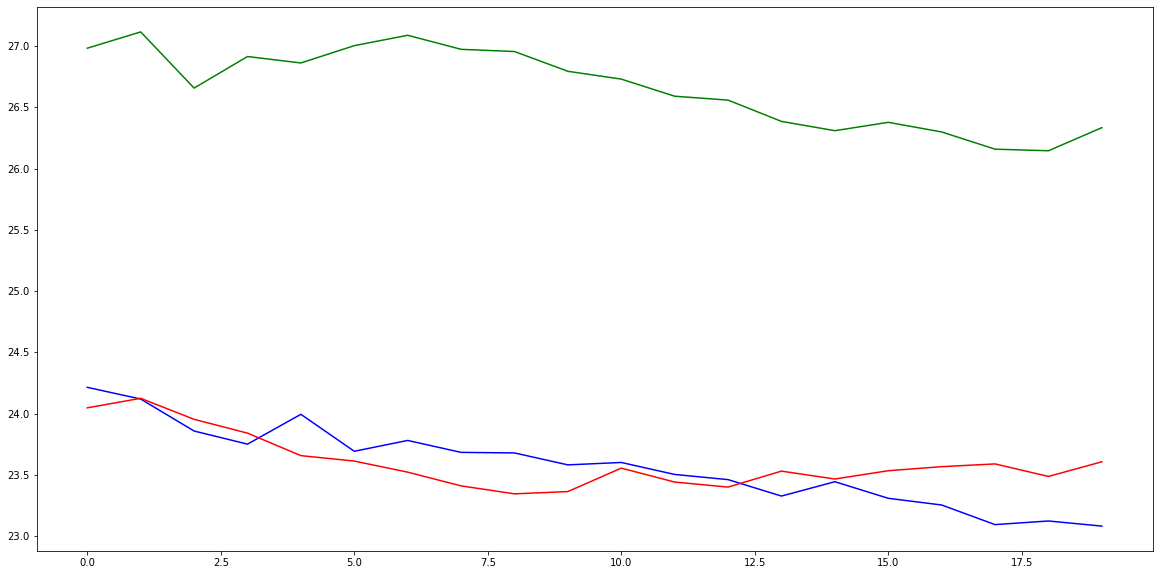

In [70]:
plt.figure(figsize = (20, 10))
plt.plot(np.std(Data_40, axis = 0), "b")
plt.plot(np.std(Data_80, axis = 0), "r")
plt.plot(np.std(Data_200, axis = 0), "g")

In [109]:
mean_200_2 = np.array([])

for j in range(len(results)):
    mean_200_sub_2 = np.array([])
    for i in range(33):
        mean_200_sub_2 = np.append(mean_200_sub_2, results[j][0][i][-1])
        
    mean_200_2 = np.append(mean_200_2, np.mean(mean_200_sub_2))

In [110]:
mean_400_2 = np.array([])
for j in range(len(results)):
    mean_400_sub_2 = np.array([])
    for i in range(33):
        mean_400_sub_2 = np.append(mean_400_sub_2, results[j][1][i][-1])
        
    mean_400_2 = np.append(mean_400_2, np.mean(mean_400_sub_2))

In [113]:
mean_600_2 = np.array([])
for j in range(len(results)):
    
    mean_600_sub_2 = np.array([])
    
    for i in range(33):
        mean_600_sub_2 = np.append(mean_600_sub_2, results[j][2][i][-1])
        
    mean_600_2 = np.append(mean_600_2, np.mean(mean_600_sub_2))

In [114]:
np.mean(mean_200_2), np.mean(mean_400_2), np.mean(mean_600_2)

(10.778101908958943, 9.857958501818487, 10.040676002132479)

In [115]:
np.std(mean_200_2), np.std(mean_400_2), np.std(mean_600_2)

(24.0676694151277, 24.096978065194715, 24.436038522788312)

In [32]:
np.mean(mean_40_1), np.mean(mean_80_1), np.mean(mean_200_1)

(1.1634818327850196, 0.1559618931660824, 0.6643289194748819)

In [87]:
np.std(mean_40_1), np.std(mean_80_1), np.std(mean_200_1)

(12.840766926861253, 12.345467915257384, 14.334361190614533)

In [38]:
np.mean(mean_40_2), np.mean(mean_80_2), np.mean(mean_200_2)

(0.9120712577681613, -0.14758646904467765, 0.5389270761038578)

In [21]:
np.std(mean_40_2), np.std(mean_80_2), np.std(mean_200_2)

(12.924501942888787, 12.345467915257384, 14.334361190614533)

In [27]:
np.mean(mean_40_3), np.mean(mean_80_3), np.mean(mean_200_3)

(8.385994896640607, 8.850527480044004, 9.250248077719252)

In [26]:
np.std(mean_40_3), np.std(mean_80_3), np.std(mean_200_3)

(21.352164771559533, 21.207850591596525, 22.225756261009792)

In [61]:
test = np.array([mean_40_3, mean_80_3, mean_200_3])

In [62]:
(np.sum(np.argmax(test, axis = 0) == 0) / len(np.argmax(test, axis = 0)) + np.sum(np.argmin(test, axis = 0) == 0) / len(np.argmax(test, axis = 0))) / 2

0.375

In [63]:
(np.sum(np.argmax(test, axis = 0) == 1) / len(np.argmax(test, axis = 0)) + np.sum(np.argmin(test, axis = 0) == 1) / len(np.argmax(test, axis = 0))) / 2

0.225

In [64]:
(np.sum(np.argmax(test, axis = 0) == 2) / len(np.argmax(test, axis = 0)) + np.sum(np.argmin(test, axis = 0) == 2) / len(np.argmax(test, axis = 0))) / 2

0.4

In [ ]:
for i in range(mean_40_1):
    mean_40_1[i]
    

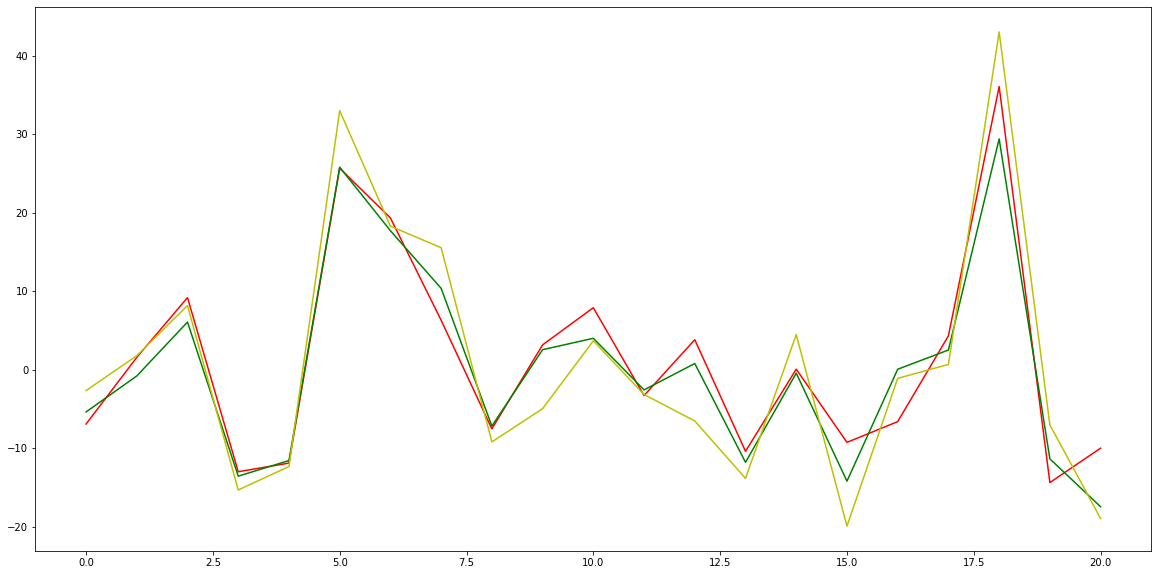

In [39]:
plt.figure(figsize = (20, 10))
plt.plot(mean_40_1, "r")
plt.plot(mean_80_1, "g")
plt.plot(mean_200_1, "y")

In [116]:
intersect_40_80_full = np.array([])
intersect_40_200_full = np.array([])
intersect_80_200_full = np.array([])

for j in range(len(results)):
    
    intersect_40_80 = np.array([])
    intersect_40_200 = np.array([])
    intersect_80_200 = np.array([])
    for i in range(33):
        portfolio_40 = results[j][0][i][4]
        portfolio_80 = results[j][1][i][4]
        portfolio_200 = results[j][2][i][4]
        
        intersect_40_80 = np.append(intersect_40_80, len(np.intersect1d(portfolio_40, portfolio_80)))
        intersect_40_200 = np.append(intersect_40_200, len(np.intersect1d(portfolio_40, portfolio_200)))
        intersect_80_200 = np.append(intersect_80_200, len(np.intersect1d(portfolio_80, portfolio_200)))
        
    intersect_40_80_full = np.append(intersect_40_80_full, np.mean(intersect_40_80))
    intersect_40_200_full = np.append(intersect_40_200_full, np.mean(intersect_40_200))
    intersect_80_200_full = np.append(intersect_80_200_full, np.mean(intersect_80_200))


In [117]:
"""
for results w window = 200, 400, 600

"""
np.mean(intersect_40_80_full), np.mean(intersect_40_200_full), np.mean(intersect_80_200_full), np.std(intersect_40_80_full), np.std(intersect_40_200_full), np.std(intersect_80_200_full)

(7.552669552669552,
 6.672438672438672,
 9.041847041847042,
 1.7647984340376983,
 2.0383017268220387,
 1.4215988542231537)

In [72]:
"""
for results1
"""
np.mean(intersect_40_80_full), np.mean(intersect_40_200_full), np.mean(intersect_80_200_full), np.std(intersect_40_80_full), np.std(intersect_40_200_full), np.std(intersect_80_200_full)

(5.8932178932178925,
 4.157287157287157,
 5.607503607503609,
 1.5917882281343185,
 1.5268700953395626,
 1.5871625283439827)

In [74]:
"""
for results2
"""
np.mean(intersect_40_80_full), np.mean(intersect_40_200_full), np.mean(intersect_80_200_full), np.std(intersect_40_80_full), np.std(intersect_40_200_full), np.std(intersect_80_200_full)

(6.004329004329004,
 4.300144300144301,
 5.78066378066378,
 1.4343013340858946,
 1.5816270074582945,
 1.610150385392599)

In [76]:
"""
for results3
"""
np.mean(intersect_40_80_full), np.mean(intersect_40_200_full), np.mean(intersect_80_200_full), np.std(intersect_40_80_full), np.std(intersect_40_200_full), np.std(intersect_80_200_full)

(5.6393939393939405,
 3.7742424242424235,
 5.736363636363636,
 1.5472924306452378,
 1.5983369168946115,
 2.0451537377017965)

In [ ]:

intersect_40_80_full

In [67]:
len(intersect_40_80_full)

1

In [69]:
np.mean(intersect_40_80), np.std(intersect_40_80)

(7.636363636363637, 1.7023723521440168)

In [70]:
np.mean(intersect_40_200), np.std(intersect_40_200)

(5.909090909090909, 1.896785739942888)

In [71]:
np.mean(intersect_80_200), np.std(intersect_80_200)

(6.7272727272727275, 1.7968444945907387)

In [ ]:
"""
just evaluating the best columns from results data
"""

In [ ]:
mean_200_2 = np.array([])

for j in range(len(results)):
    mean_200_sub_2 = np.array([])
    for i in range(33):
        mean_200_sub_2 = np.append(mean_200_sub_2, results[j][0][i][-1])
        
    mean_200_2 = np.append(mean_200_2, np.mean(mean_200_sub_2))

In [37]:
results1[0][0][0][6]


-4.407839758127584

In [32]:
a = 1

In [33]:
a += 1

In [34]:
a

2

In [ ]:
col

In [12]:
col_dict = {}

for data in [results1, results2, results3]:
    for j in range(len(data)):

        for window in [0, 1, 2]:


            for i in range(33):

                for col in data[j][window][i][1]:
                    if col not in col_dict.keys():
                        col_dict[col] = [[]]

                    col_dict[col][0].append(data[j][window][i][6])

                
for col in col_dict.keys():
    col_dict[col].append(np.mean(col_dict[col][0]))
    col_dict[col].append(np.std(col_dict[col][0]))
    col_dict[col].append(len(col_dict[col][0]))
  

In [13]:
indx_sorted_col = np.argsort(np.array(list(col_dict.values()))[:,1])[::-1]

<ipython-input-13-ca2d183e642b>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  indx_sorted_col = np.argsort(np.array(list(col_dict.values()))[:,1])[::-1]


In [14]:
indx_sorted_col_name = [list(col_dict.keys())[j] for j in indx_sorted_col]

indx_sorted_col_mean = [list(col_dict.values())[j][1] for j in indx_sorted_col]

indx_sorted_col_std = [list(col_dict.values())[j][2] for j in indx_sorted_col]

indx_sorted_col_count = [list(col_dict.values())[j][3] for j in indx_sorted_col]


<BarContainer object of 291 artists>

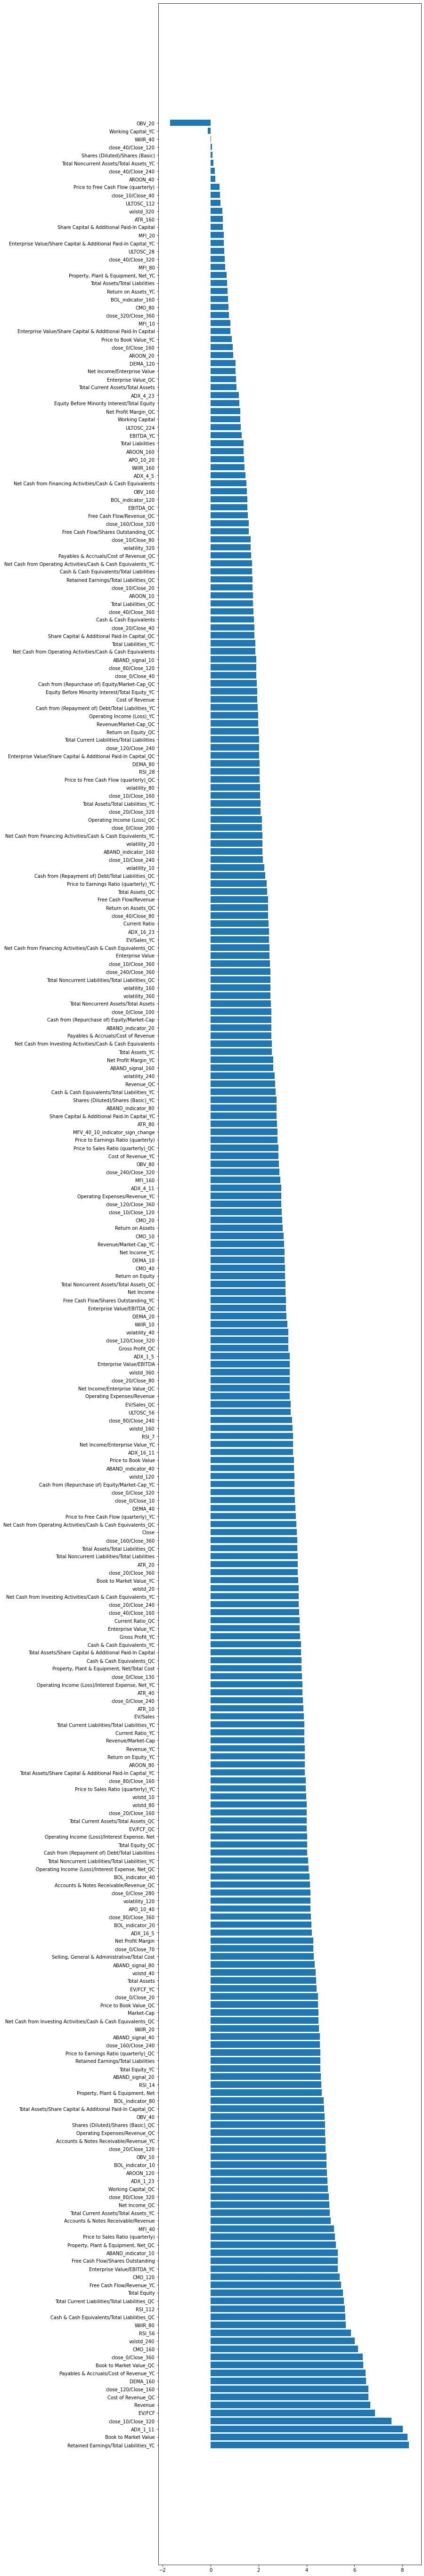

In [15]:
plt.figure(figsize = (10, 100))
plt.barh(indx_sorted_col_name, indx_sorted_col_mean)

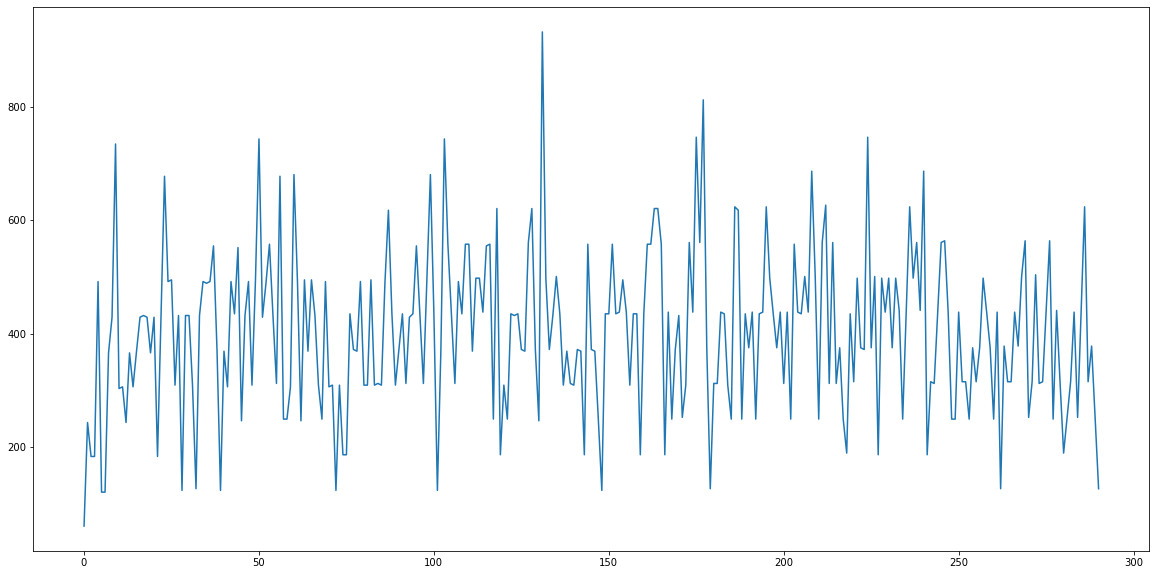

In [26]:
plt.figure(figsize = (20,10))
plt.plot(indx_sorted_col_count)

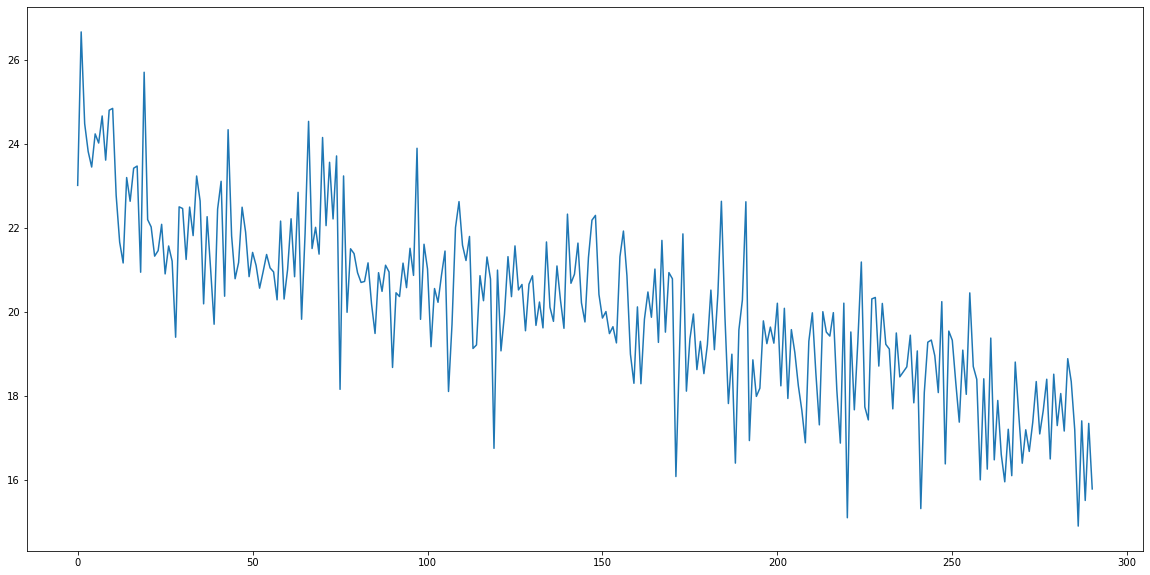

In [27]:
plt.figure(figsize = (20,10))
plt.plot(indx_sorted_col_std)

In [35]:
top50 = indx_sorted_col_name[:50]

In [36]:
with open('top_50.pkl', 'wb') as f:
    pickle.dump(top50, f)

In [28]:
col_size = {}
col_size_count = {}

for data in [results1, results2, results3]:
    for j in range(len(data)):

        for window in [0, 1, 2]:


            for i in range(33):
                
                size = len(data[j][window][i][1])
                
                if size not in col_size.keys():
                    col_size[size] = [[]]
                    
                col_size[size][0].append(data[j][window][i][6])
                
for size in col_size.keys():
    col_size[size].append(np.mean(col_size[size][0]))
    col_size[size].append(np.std(col_size[size][0]))
    col_size[size].append(len(col_size[size][0]))
    

In [29]:
sizes = np.unique(list(col_size.keys()))

indx_sorted_size_mean = [col_size[j][1] for j in sizes]
indx_sorted_size_std = [col_size[j][2] for j in sizes]
indx_sorted_size_count = [col_size[j][3] for j in sizes]


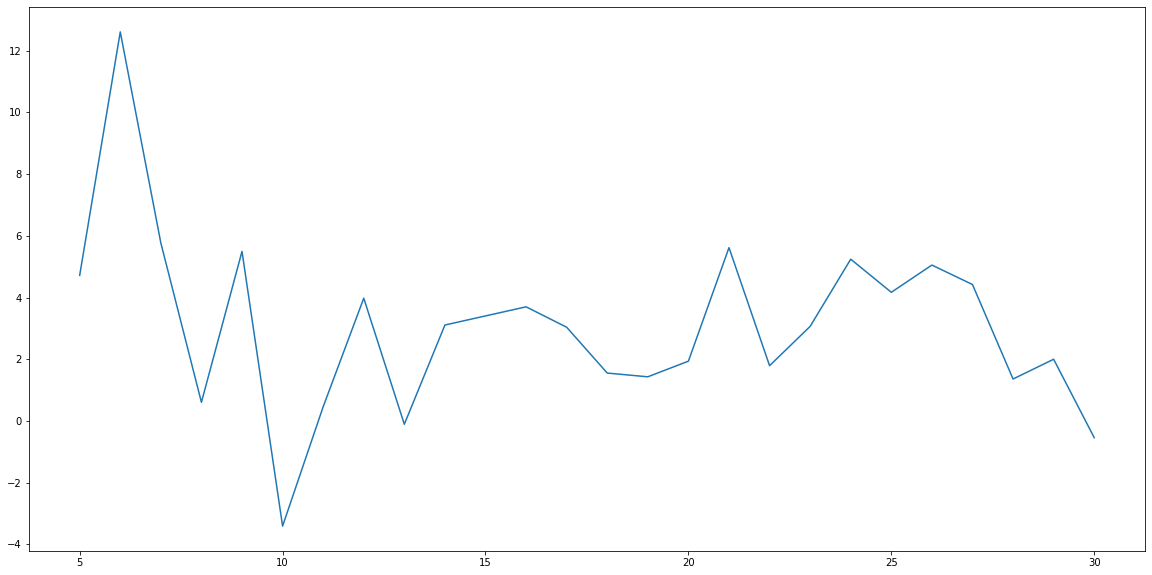

In [32]:
plt.figure(figsize = (20, 10))
plt.plot(sizes, indx_sorted_size_mean)

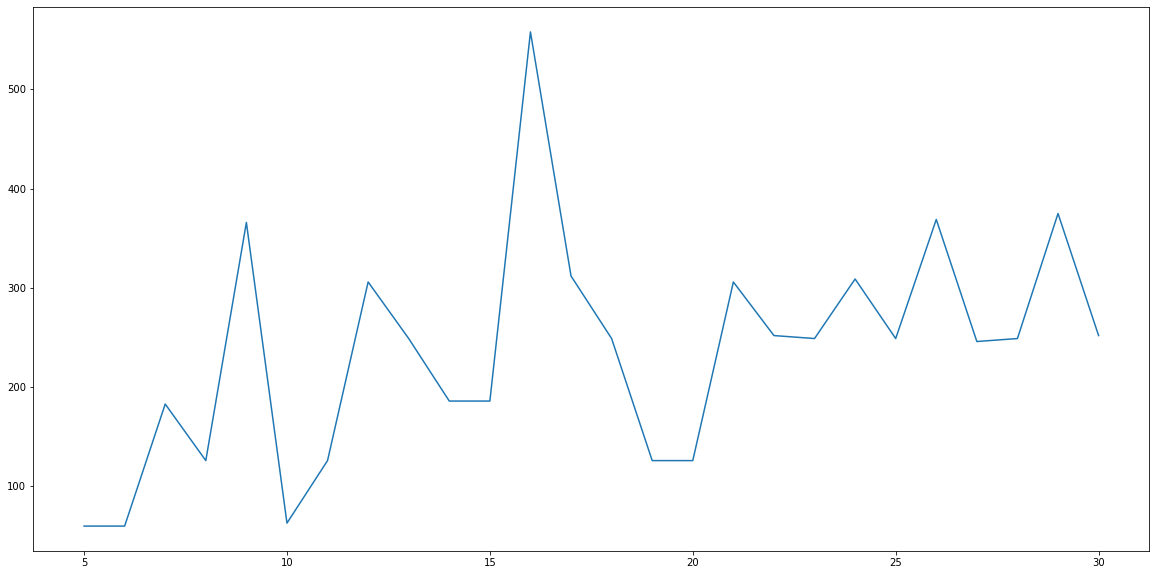

In [33]:
plt.figure(figsize = (20, 10))
plt.plot(sizes, indx_sorted_size_count)

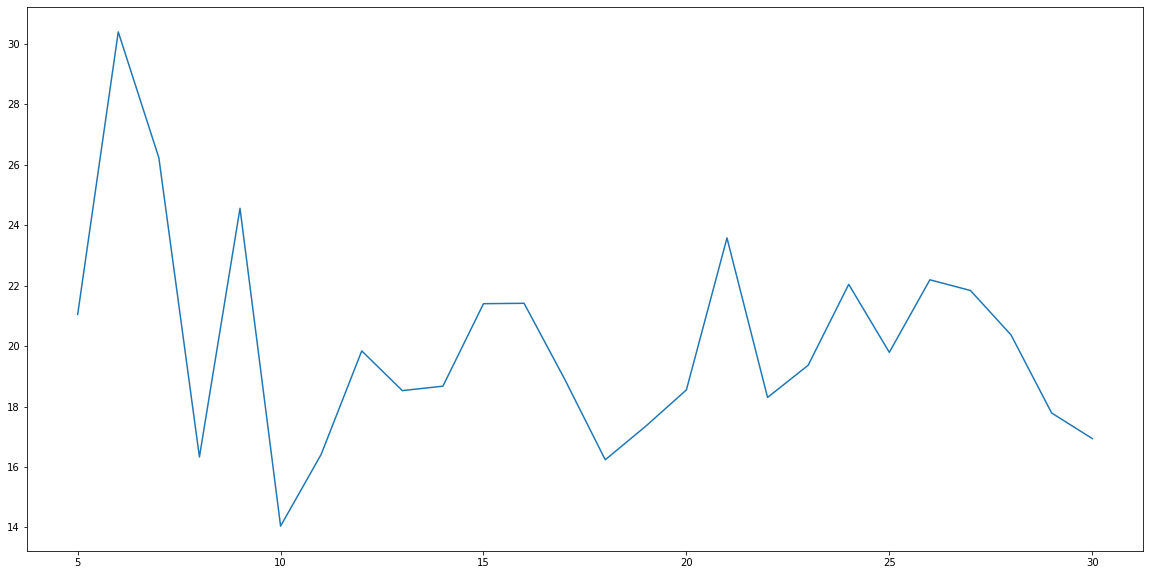

In [34]:
plt.figure(figsize = (20, 10))
plt.plot(sizes, indx_sorted_size_std)